In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Ensure the file path is correct)
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

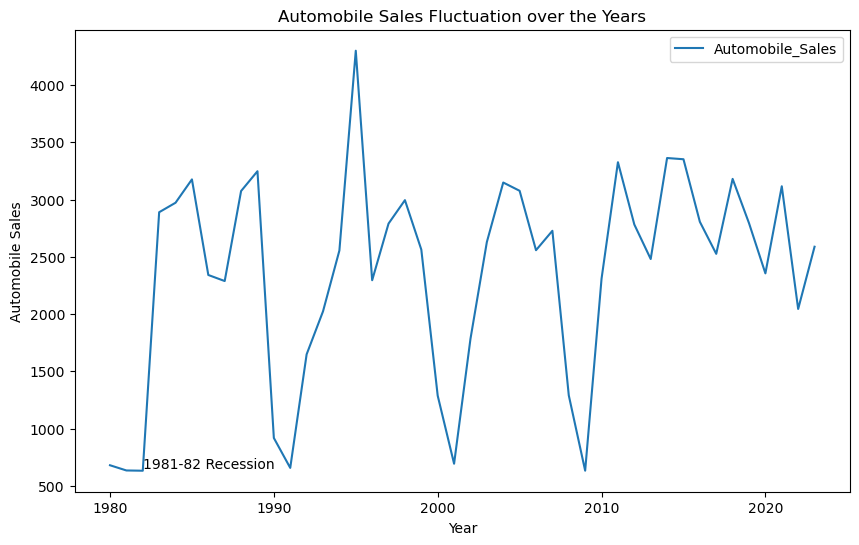

In [3]:
# Grouping data by Year and calculating the mean Automobile Sales
df_trend = df.groupby('Year')['Automobile_Sales'].mean()

plt.figure(figsize=(10, 6))
df_trend.plot(kind='line')
plt.title('Automobile Sales Fluctuation over the Years')
plt.ylabel('Automobile Sales')
plt.xlabel('Year')
plt.text(1982, 650, '1981-82 Recession') # Optional text annotation
plt.legend()
plt.show()
# Save this output as Line_plot_1.png

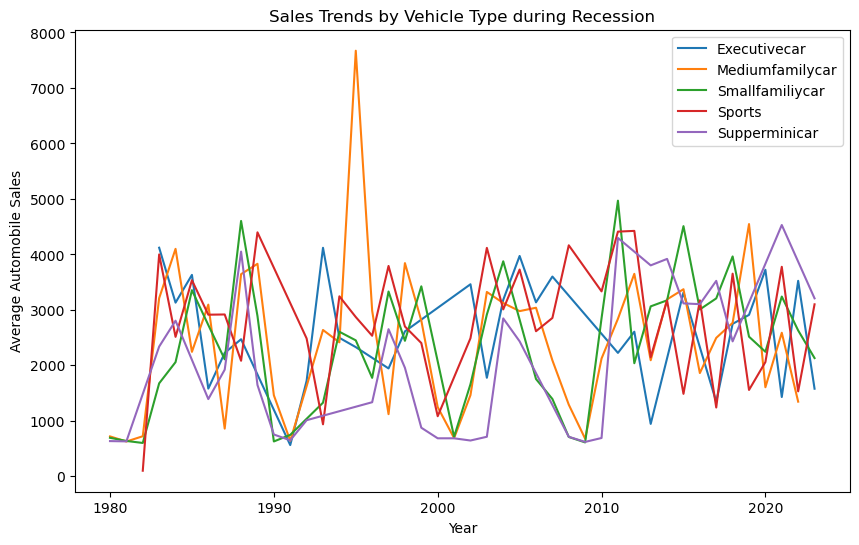

In [4]:
# Group by Year and Vehicle_Type
df_M = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_M.set_index('Year', inplace=True)
df_M = df_M.groupby(['Vehicle_Type'])['Automobile_Sales']

plt.figure(figsize=(10, 6))
df_M.plot(kind='line')
plt.title('Sales Trends by Vehicle Type during Recession')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.legend()
plt.show()
# Save this output as Line_plot_2.png

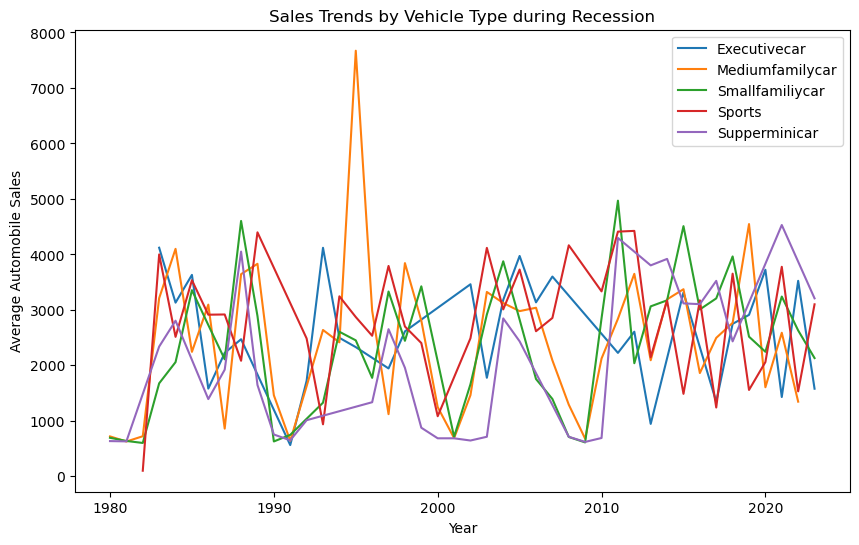

In [5]:
# Group by Year and Vehicle_Type
df_M = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_M.set_index('Year', inplace=True)
df_M = df_M.groupby(['Vehicle_Type'])['Automobile_Sales']

plt.figure(figsize=(10, 6))
df_M.plot(kind='line')
plt.title('Sales Trends by Vehicle Type during Recession')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.legend()
plt.show()
# Save this output as Line_plot_2.png

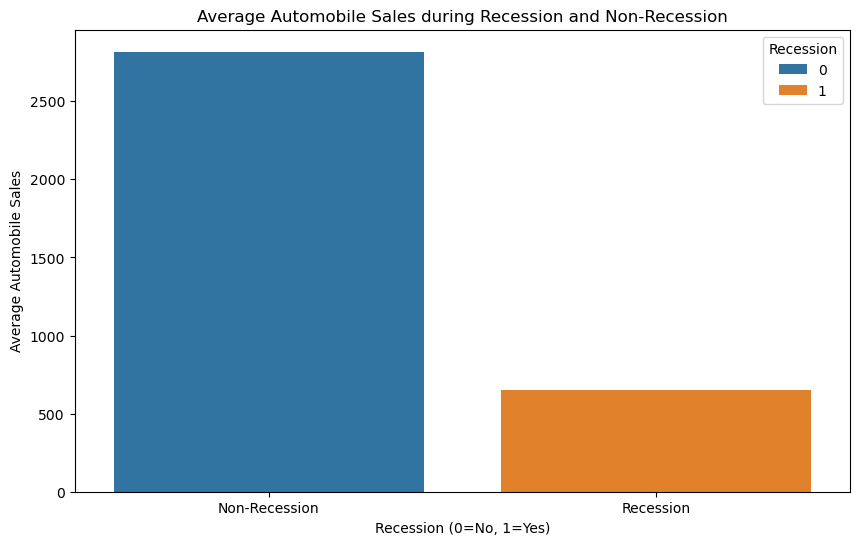

In [6]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xlabel('Recession (0=No, 1=Yes)')
plt.ylabel('Average Automobile Sales')
plt.xticks([0, 1], ['Non-Recession', 'Recession'])
plt.show()
# Save this output as Bar_Chart.png

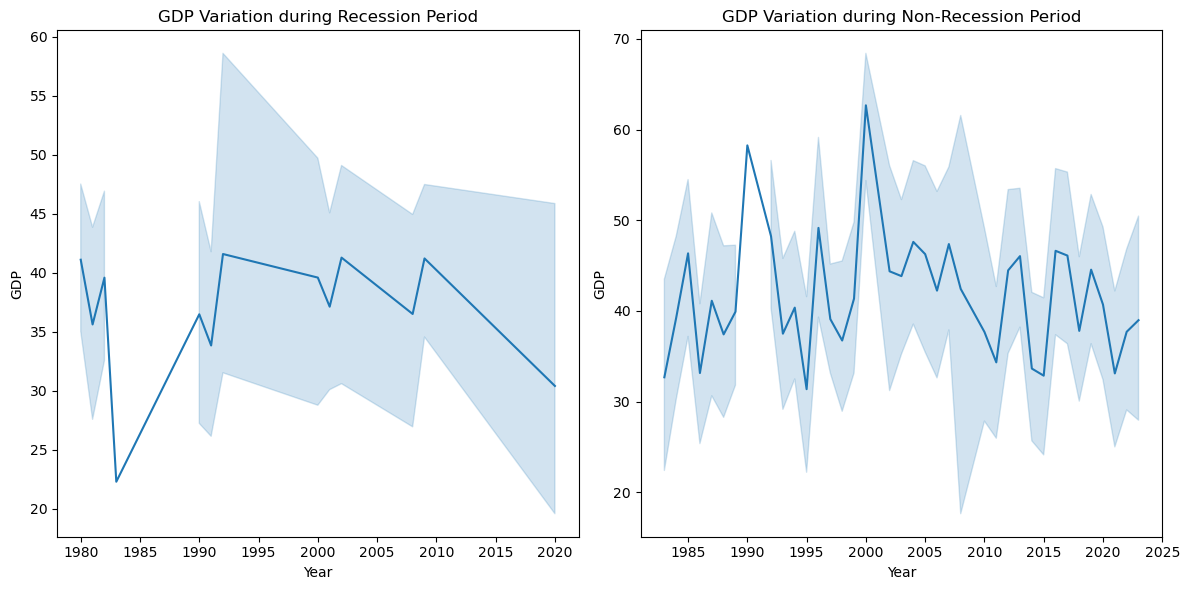

In [7]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig = plt.figure(figsize=(12, 6))

# Subplot 1: Recession
ax0 = fig.add_subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, ax=ax0)
ax0.set_title('GDP Variation during Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Subplot 2: Non-Recession
ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.tight_layout()
plt.show()
# Save this output as Subplot.png

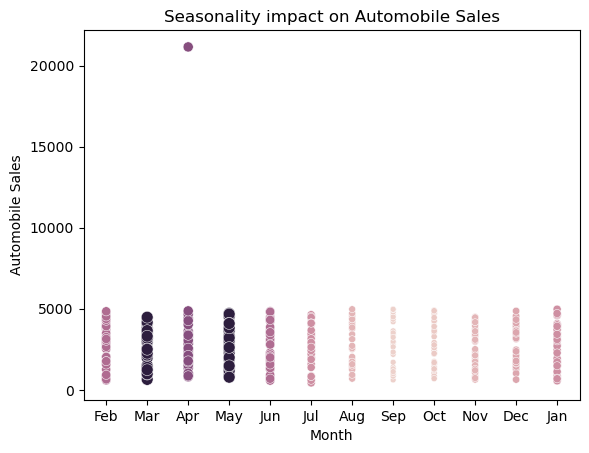

In [8]:
non_rec_data = df[df['Recession'] == 0]
size = non_rec_data['Seasonality_Weight'] # Bubble size

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.show()
# Save this output as Bubble.png

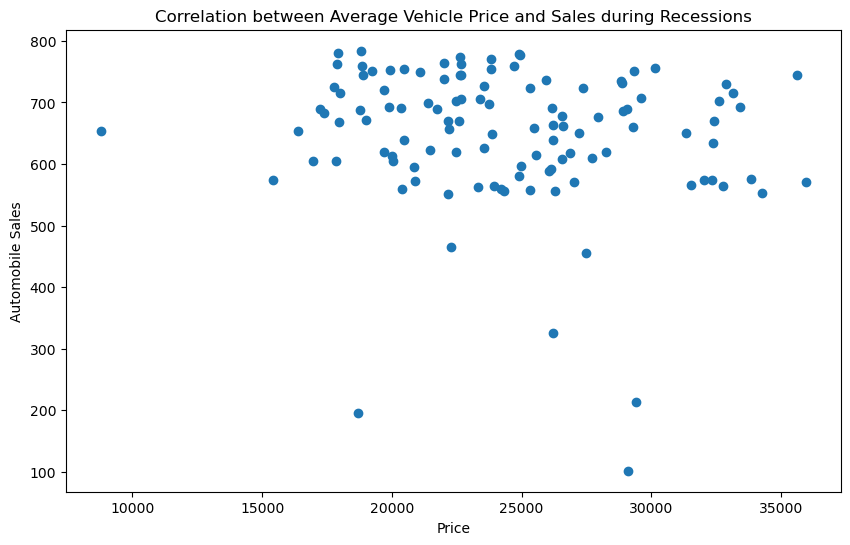

In [9]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.title('Correlation between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.show()
# Save this output as Scatter.png

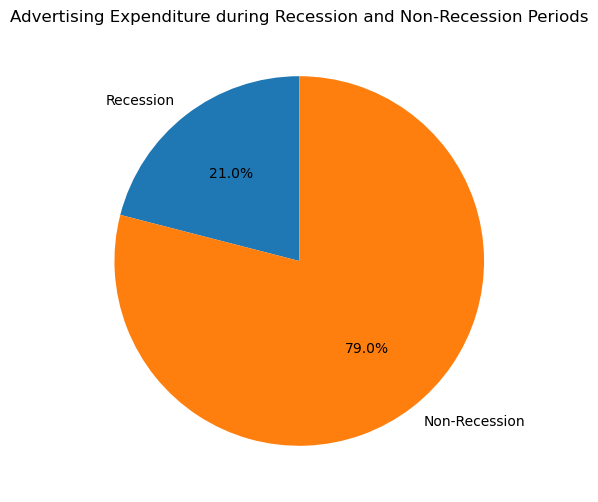

In [10]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()
# Save this output as Pie_1.png

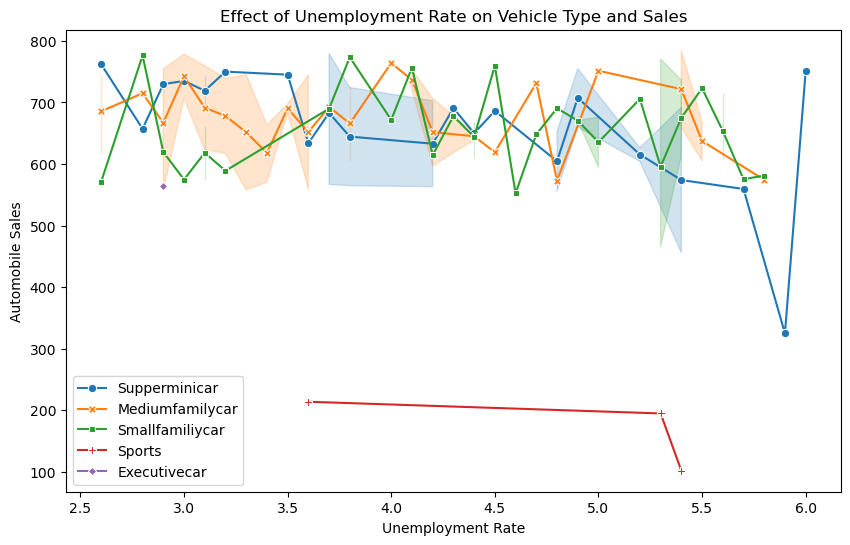

In [14]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))

# Note: Changed 'Unemployment_Rate' to 'unemployment_rate'
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', 
             hue='Vehicle_Type', style='Vehicle_Type', markers=True, dashes=False)

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(loc='best')
plt.show()

In [20]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

# ---------------------------------------------------------------------------------
# Create the Dropdown options
# List of years 
year_list = [i for i in range(1980, 2024, 1)]
# ---------------------------------------------------------------------------------

# Create the layout of the app
app.layout = html.Div([
    # TASK 2.1: Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard", 
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}),
    
    # TASK 2.2: Add two dropdown menus
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            value='Yearly Statistics',
            placeholder='Select a Report Type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
        )
    ]),
    
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value=2010,
            placeholder='Select-year',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'},
            # Disable year dropdown when Recession Report is selected
            disabled=False 
        )
    ]),
    
    # TASK 2.3: Add a division for output display
    html.Div([
        html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
    ])
])

# TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Recession Period Statistics':
        return True # Disable year selection for Recession Report
    else:
        return False

# Define the callback function to update the output container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'), 
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]
        
        # TASK 2.5: Create and display graphs for Recession Report Statistics

        # Plot 1: Average Automobile Sales fluctuation over Recession Period
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',
            title="Average Automobile Sales Fluctuation over Recession Period")
        )

        # Plot 2: Average number of vehicles sold by vehicle type
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
            title="Average Number of Vehicles Sold by Vehicle Type")
        )
        
        # Plot 3: Total expenditure share by vehicle type
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type',
            title="Total Expenditure Share by Vehicle Type")
        )

        # Plot 4: Effect of unemployment rate on vehicle type and sales
        # Grouping by Unemployment_Rate and Vehicle_Type to find mean sales
        unemp_data = recession_data.groupby(['Unemployment_Rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemp_data, x='Unemployment_Rate', y='Automobile_Sales',
            color='Vehicle_Type',
            labels={'Unemployment_Rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
            title="Effect of Unemployment Rate on Vehicle Type and Sales")
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)], style={'display': 'flex'})
        ]

    elif (input_year and selected_statistics == 'Yearly Statistics'):
        # Filter the data for the selected year
        yearly_data = data[data['Year'] == input_year]
        
        # TASK 2.6: Create and display graphs for Yearly Report Statistics
        
        # Plot 1: Yearly Automobile Sales using line chart for the whole period
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, x='Year', y='Automobile_Sales',
            title='Yearly Automobile Sales Fluctuation')
        )
            
        # Plot 2: Total Monthly Automobile Sales using line chart
        mas = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(mas, x='Month', y='Automobile_Sales',
            title=f'Total Monthly Automobile Sales in the year {input_year}')
        )

        # Plot 3: Bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
            title=f'Average Vehicles Sold by Vehicle Type in the year {input_year}')
        )

        # Plot 4: Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type',
            title=f'Total Advertisement Expenditure for each Vehicle in {input_year}')
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]
        
    else:
        return None

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
Cell In[20], line 112, in update_output_container(
    selected_statistics='Recession Period Statistics',
    input_year=2010
)
    105 R_chart3 = dcc.Graph(
    106     figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type',
    107     title="Total Expenditure Share by Vehicle Type")
    108 )
    110 # Plot 4: Effect of unemployment rate on vehicle type and sales
    111 # Grouping by Unemployment_Rate and Vehicle_Type to find mean sales
--> 112 unemp_data = recession_data.groupby(['Unemployment_Rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        recession_data =            Date  Year Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980   Jan          1               108.24   
1     2/29/1980  1980   Feb          1                98.75   
2     3/31/1980  1980   Mar          1    

In [16]:
%pip install dash

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [dash]m━━━  9/10 [dash]y]s]
Note: you may need to restart the kernel to use updated packages.
